## Predicting GPU Performance in 3DMark and Identifying Feature Importance

Growing up, I would take any chance I could to take apart a computer. I was fascinated by looking at everything inside, and although I had absolutely zero idea how they worked, over the years, I began to learn. I learned what a CPU and GPU were in 2nd grade when my elementary school had a technology day, and folks from Dell came in to teach us all about how a computer worked. If I wasn't hooked before, I was 110% hooked then.

Fast forward to March 2nd, 2011. I get home from school and open YouTube; a new video pops into my feed. Titled "Fault Line Episode 1: Bad Part of Town," this was the worldwide reveal trailer for what's now considered one of the best video games of all time, Battlefield 3.

The graphics on display were like nothing I had ever seen before. In fact, they were like nothing anyone had ever seen before. It's hard to describe the impact that trailer made; it redefined what people thought was possible for real-time graphics. I thought to myself, there's no way my little Xbox 360 could pull something like that off, and I was right. The game was made from the ground up for what was then the next generation of GPU hardware, hardware you could only get from a cutting-edge PC. That's where my interest in PCs, and specifically GPUs, skyrocketed. I've truly been hooked ever since.

Of course, it wasn't until many years later that I could afford to build my first PC. BF3 had come and gone by then, but it was the very first game I ever booted up on my then-new system.

I had a top-of-the-line GTX 980, one of the fastest cards on the market at that time. I would spend hours downloading every game I could just to see how they ran, and of course, I spent hours in a benchmark tool called 3DMark. 3DMark is often the first thing many enthusiasts do when they get a new GPU; it's a great way to get a high-level look at the type of performance you can expect to pull from your shiny new hardware.

In my quest to build my data science muscles, I sought to create a model that could predict performance in 3DMark based on 17 different features. Here's how it went.

## 1. Data

I started by searching Kaggle for datasets on GPUs and benchmark performance, and luckily, I didn't have to search long. I found two different datasets. One contained all sorts of data on GPUs and their specific hardware features, and the other contained benchmark scores for the very same GPUs in 3DMark!

Even better, they were made by the same person, so there was a good level of consistency between the GPU names in each dataset. It made merging the two simple. All I had to do was rename the GPU in each dataset to 'GPU', and merge on it. 

## 2. Model Method

I knew from the start I wanted to use some sort of tree based ensembe method. I liked the idea behind ensenble methods and thought they'd be the best place to start. I had some practive with random forest before, so I decided that's where I start. 

## 3. Data Cleaning

I wasn't sure from the start which features were going to be most important, so I started with the assumption that every feature was worth using and began exploring missing values.

The bad news: There were columns that had over half their data missing. 
The good news: Most columns with a large amount of missing data seemed, at least intuitively, unimportant as an indicator of benchmark performance (features like price and GPU value).

After I had a sense of what features were missing and in what amounts, I did a quick scan for duplicated GPUs and dropped those.

Then, I dropped every feature that had over half of its data missing, which was seven features in total, and dropped specific rows where data was missing for the other features. (looking back, I should have explored replacing those missing values with either median or mode. Next time I will!)

I started with 1088 rows and 24 features and ended with 786 rows and 17 features.

My final dataset had no missing values, no concerning outliers, and was ready for EDA.

## 4. EDA

My first goal was an understanding of which features were most correlated with each other to inform the rest of my EDA, so I created a heat map. I also made scatterplots to get a second view. 

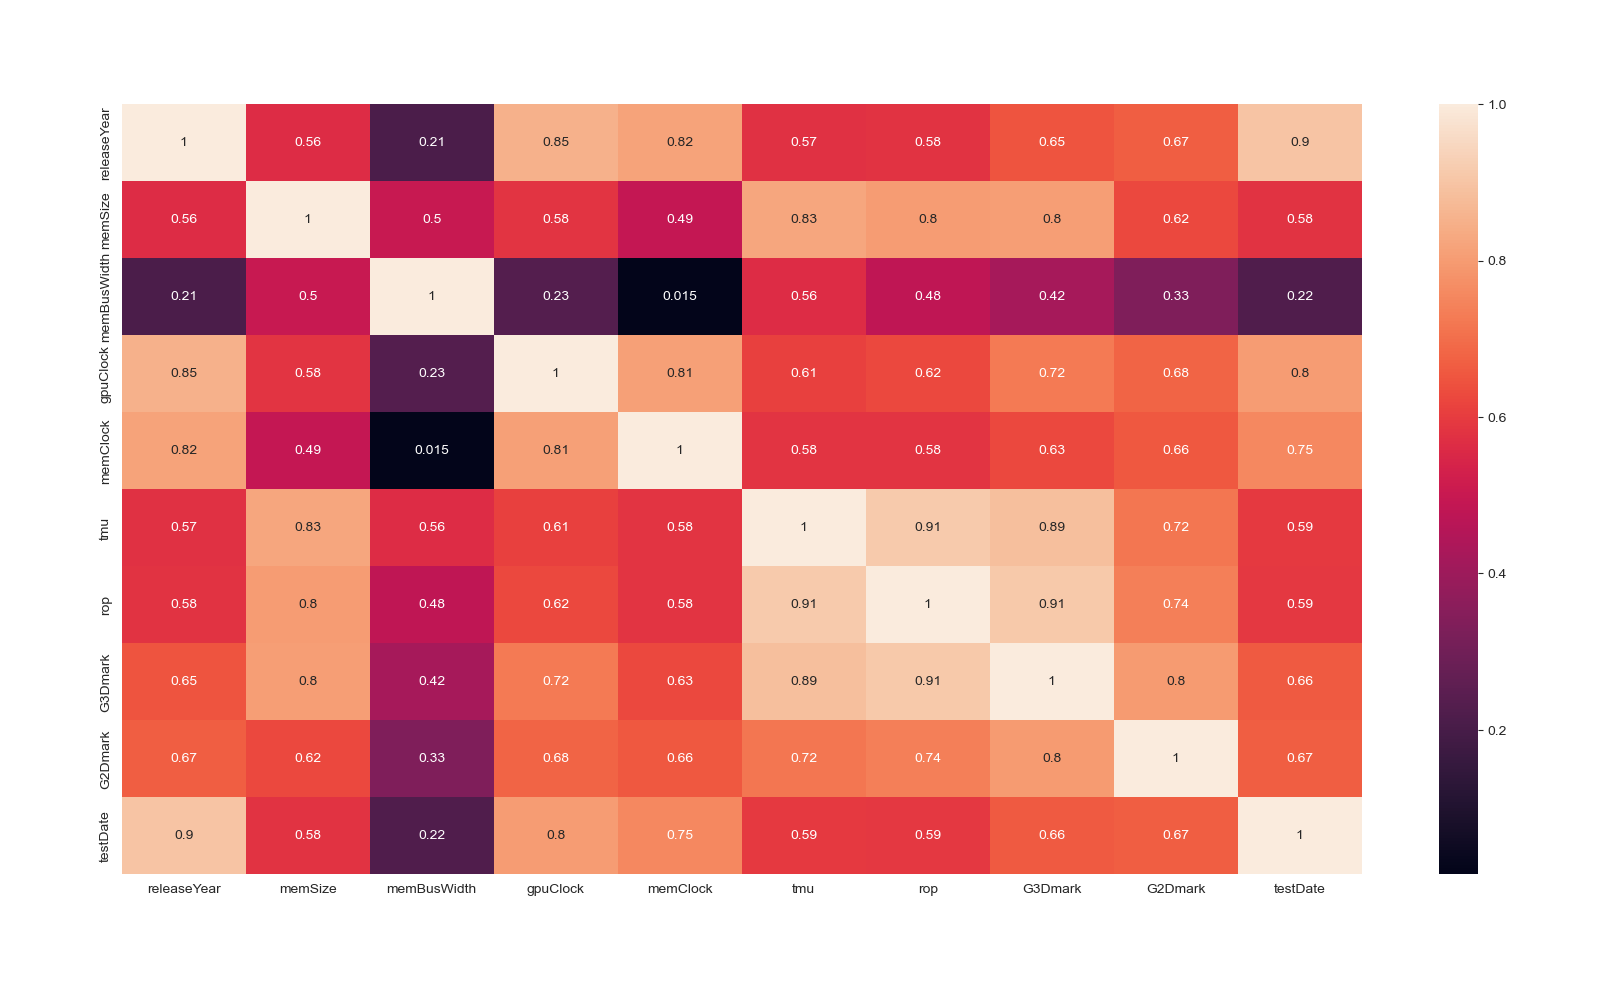

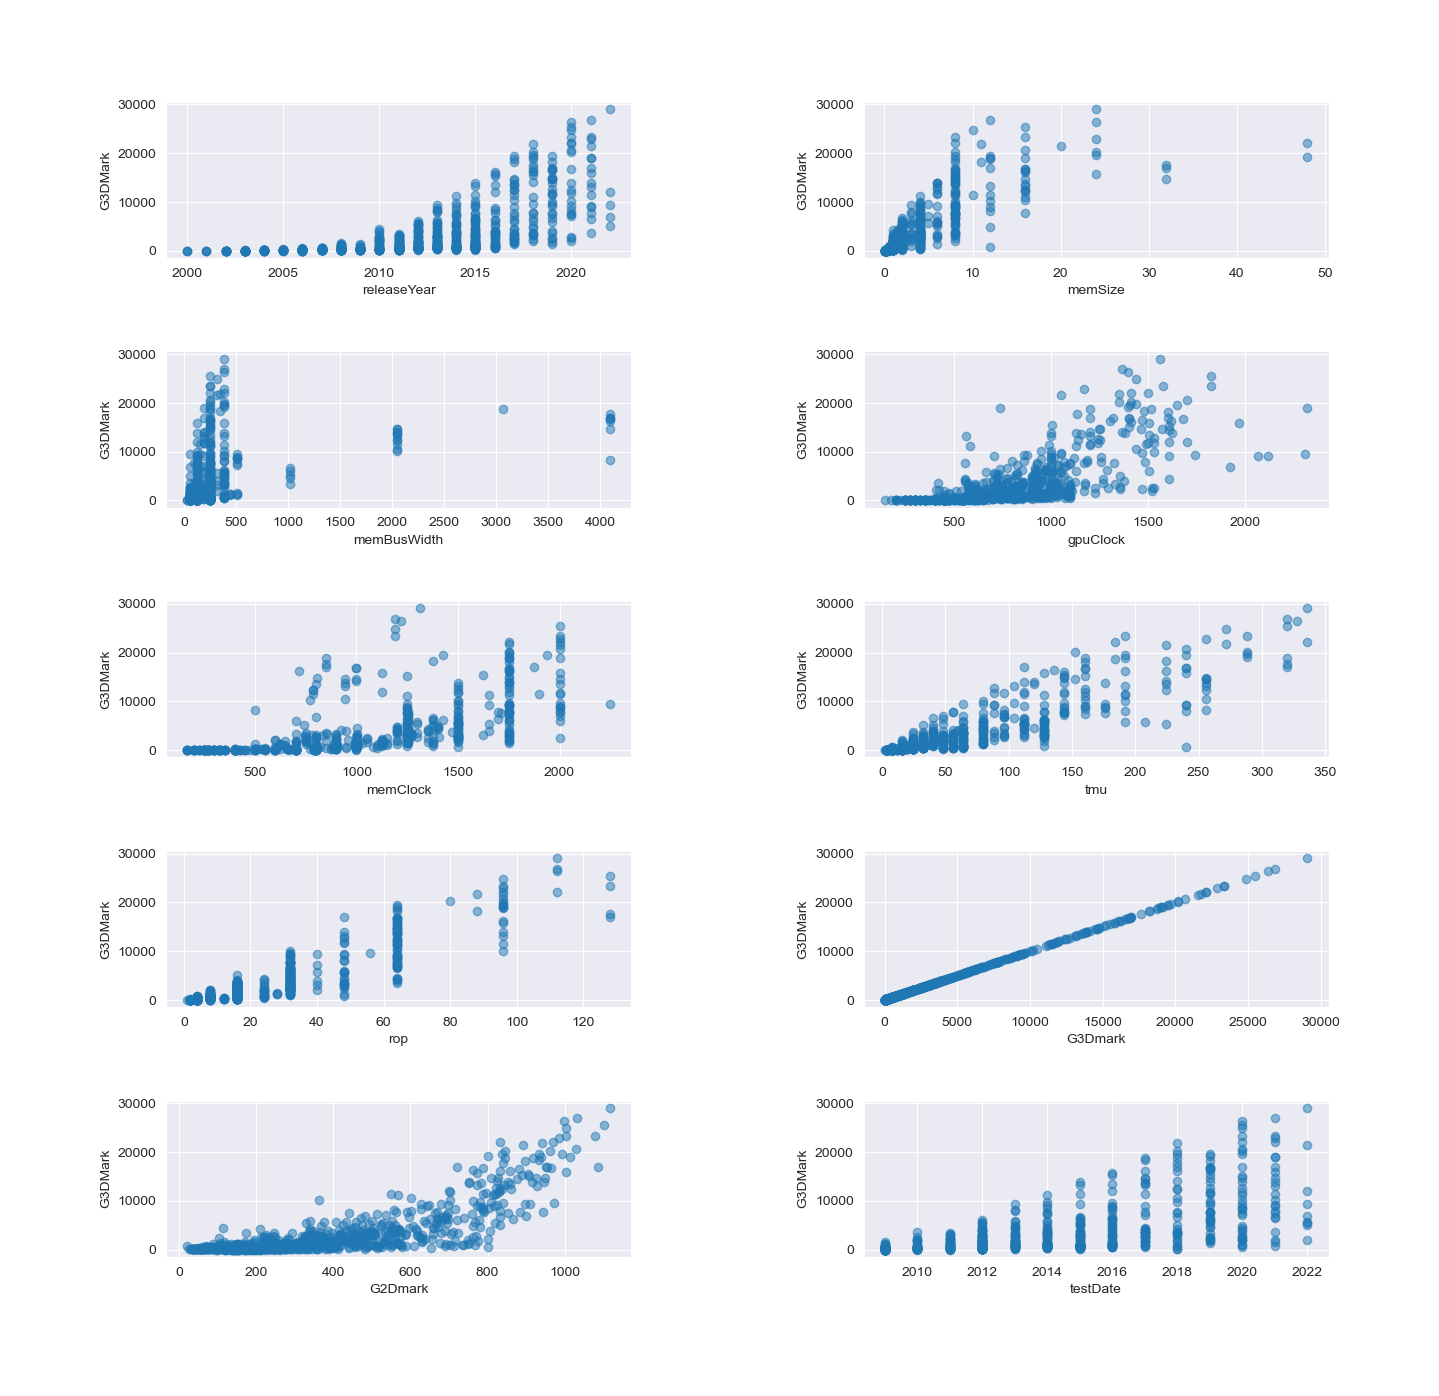

From the heatmap, it appeared that Render Output Units, Texture Mapping Units, Memory Clock Speeds, and GPU clock speeds were the features most correlated with overall performance; it was a good start. Based on my understanding of GPU hardware, I knew the type of memory a card came with would be important too, but not something I could show from a heatmap.

The scatter plots were interesting. None of these features, besides ROPs and TMUs, appeared to have linear relationships; it seemed like the distributions of possible benchmark scores just got wider over time. This would make sense intuitively.

Each year, NVIDIA and AMD release new cards that range from $30 basic video cards to simply power a display, to behemoths that push what's possible. The lower bounds typically stay the same each year in terms of performance, but the new cutting-edge cards push the upper boundary higher and higher. You can see those distributions in the scatter plots above. 

## 5. Modeling

As mentioned before, I chose to work with scikit-learn's tree-based methods, specifically the random forest and gradient boost models.

I chose these two for a few primary reasons:

1. They don't require scaled data.
2. Simplicity. A basic RF model can be created in a few lines of code.
3. They're quick to train and test.
4. They perform well! Unreasonably well, some may say. I could get better results from more complex models, but would any added improvement be worth the time, complexity, and computational load? Probably not.


I encoded my data in two different ways: dummy encoding and count encoding. Dummy encoding left me with almost 1000 features and significantly slowed down hyperparameter tuning. Count encoding fared much better, and I chose count encoding specifically because it doesn't increase my feature space.

Below, you can see the Root Mean Squared Error and the Max Error for the eight different models I created. My tuned Gradient Boost Model gave me the best results. (And by tuned, I'm talking specifically about the learning_rate and n_estimators hyperparameters. Learning_rate was set to 0.1, and n_estimators was set to 250.)

The second-best was my out-of-the-box Random Forest model using count-encoded data that was scaled using the standard scaler

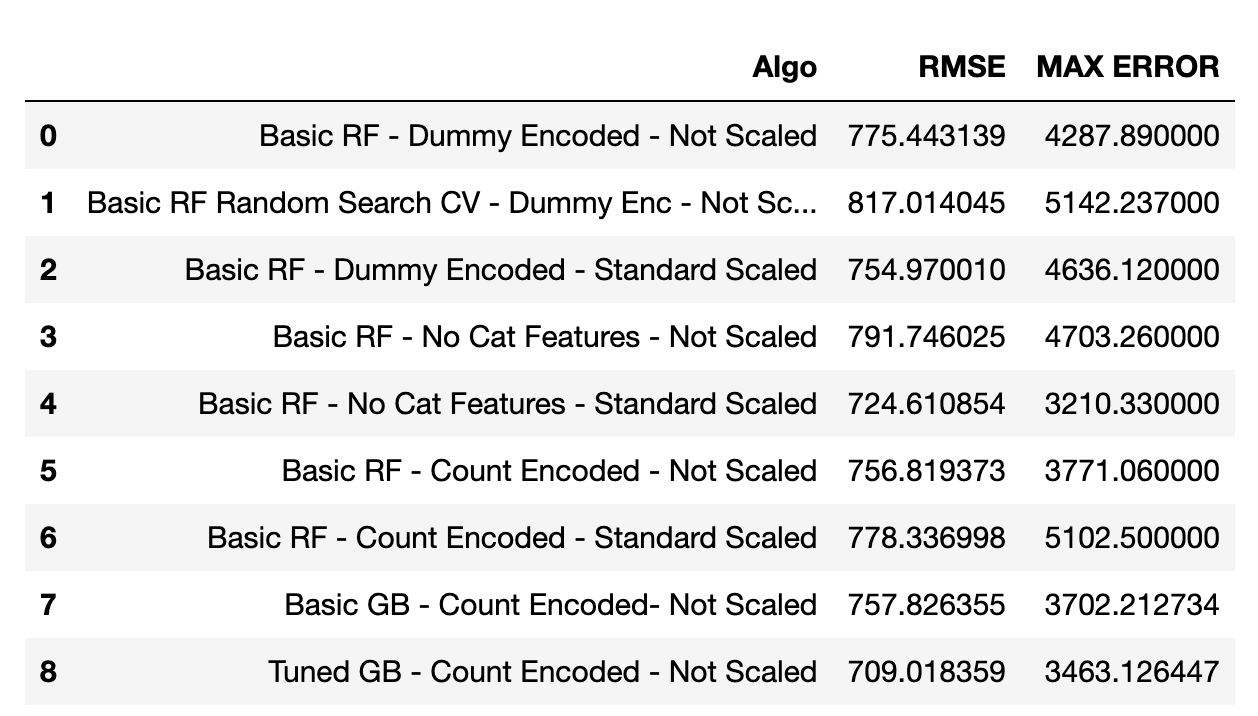

## 6. Feature Importance

Below is a feature importance graph and a permuation importance graph pulled from my tuned Gradient Boost model. As expected from looking at the initial scatterplots, TMU and ROP are the two most important features, followed by memory clock and GPU clock. Texture Mapping Units are king in this scenario. It's nice to see this fall in line with initial expectations. 

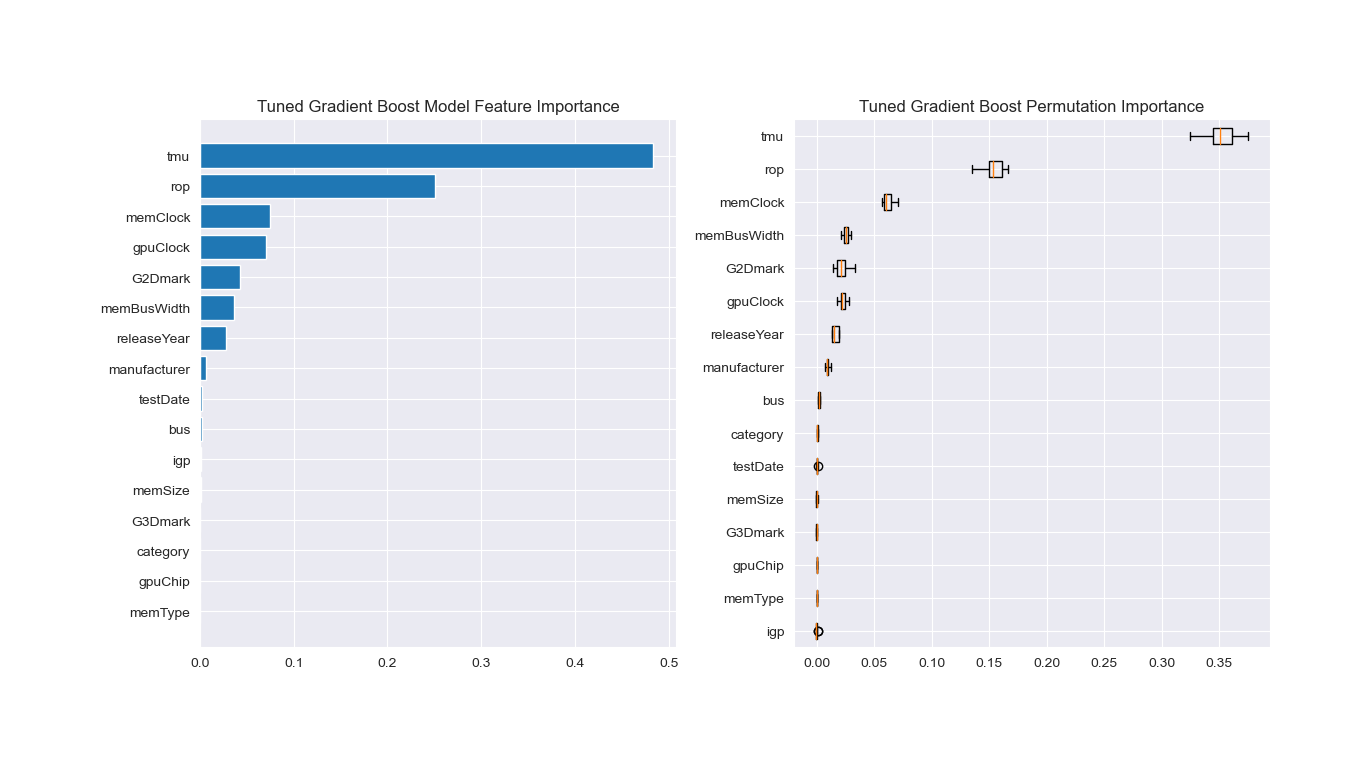

## 7. Conclusions

Moving forward, I would love to obtain more detailed data exclusively on newer GPUs (say, 2020+) and analyze how these results might vary. Specifically for NVIDIA cards, the dataset I utilized did not include the CUDA core count, which would probably be a far better indicator of overall performance than any other feature here.

I assume this omission was due to the fact that CUDA cores are unique to NVIDIA cards. I'd be interested in revisiting this project with a focus solely on NVIDIA card data.

The scope of my data was also limited; 768 rows and 17 columns isn't a massive dataset by any means. How would the results change if I had double, or even triple, the amount of data I had here?

Given that your average benchmark score ranges anywhere between 10,000 and 30,000, I was pleased with the results. I believe these predictions could give you a fairly accurate idea of what tier your GPU is in (low, mid, high-end)